# MS Topo Feature Layer OS API query - Wind Turbines

### 1. Extracting Wind Turbines from OS

This analysis uses extraction, transform and load of Topographic area or point features within Ordnance Survey’s MasterMap Topography Layer using OS-PAW. This is Ordnance Survey Python API Wrapper designed to make data from the OS Data Hub APIs readily accessible to python developers. More information on the OS Features API can be found here https://osdatahub.os.uk/docs/wfs/overview

#### Results

This analysis shows there are 6 Wind Turbines in the PDNP. More research is needed to understand the limitations of mastermap and the threshold (if any) applied to mapping structures as points. The PDNP database shows >20 approved in the last 20 years. However, this process as shown the number outside the boundary is significant. 

This analysis can also easily be repeated for other National Parks.

#### Basic Steps

1. Query the Topographic point layer using a BBOX for the PDNP
2. Subset the data based on the 'DescriptiveTerm' == 'Wind Turbine' 
3. Cut the data to the PDNP Boudary and export

#### More information

The descriptive terms of topographic point and area features can be found in Annex D (page 43): https://www.ordnancesurvey.co.uk/documents/os-mastermap-topography-layer-product-guide.pdf

Descriptive Terms appear on OS basemaps as the following:

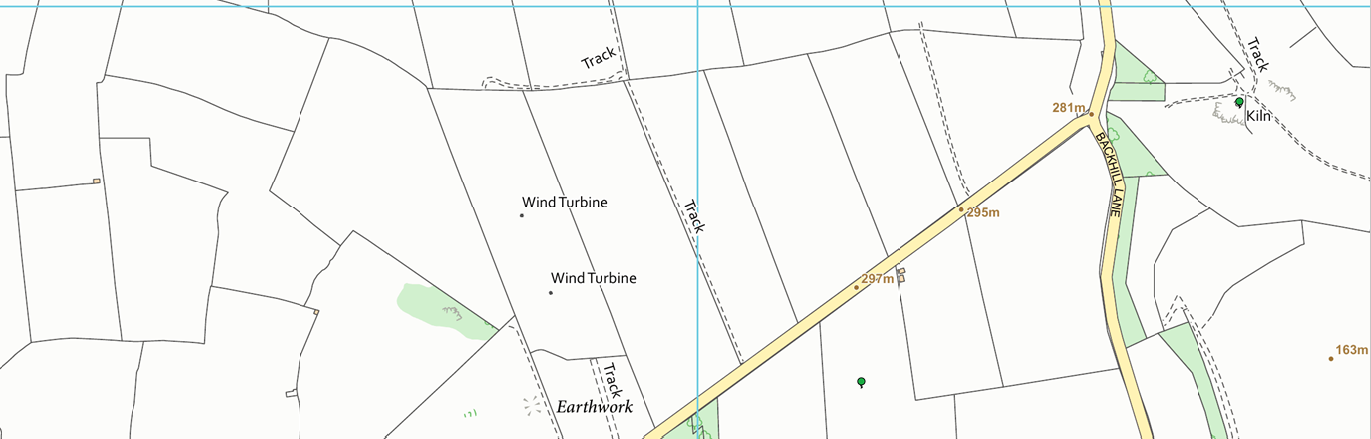

### 2. Analysis

#### Packages
Here there are a few open source python packages in our code, and connect to two APIs accessible via the OS Data Hub.

In [1]:
import os
import sys
import json
import glob
import folium
import pandas as pd
import geopandas as gpd
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
from os_paw.wfs_api import WFS_API
from folium.plugins import FloatImage

print('=> Imported libraries')

=> Imported libraries


### Setting up the API

Location data is fetched from OS Data Hub APIs. This analysis uses Premium data from the OS Features API, so you will need a Premium account.

In [2]:
# Set API key, copied from osdatahub.os.uk
key = 'xxx'

Create an instance of the OS Python API Wrapper:

In [3]:
# Create WFS API instance 
wfs_api = WFS_API(api_key=key)

Fetching the data:

In [22]:
# Choose a Spatial Reference System
SRS = 'EPSG:27700'

# Choose an OS Web Feature Service product
TYPE_NAME = 'Topography_TopographicPoint'

# Create Bounding Box
BBOX = '392881,348525,432455,411261'

# Create WFS_API object and run query
data = wfs_api.get_all_features_within_bbox(type_name="Topography_TopographicPoint",
                                            bbox=BBOX,
                                            allow_premium=True,
                                            max_feature_count=100000,
                                            output_format='geojson',
                                            srs=SRS)

Build and take a look at the GeoDataFrame and check it looks ok: 

In [23]:
# Create GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(data, crs=data['crs'])

In [24]:
# view GeoDataFrame
gdf.head(n = 5)

,geometry,OBJECTID,TOID,FeatureCode,Version,VersionDate,Theme,ThemeCount,AccuracyOfPosition,ChangeDate,ReasonForChange,ChangeHistoryCount,DescriptiveGroup,DescriptiveGroupCount,DescriptiveTerm,DescriptiveTermCount,HeightAboveDatum,AccuracyOfHeightAboveDatum,HeightAboveGroundLevel,AccuracyOfHeightAboveGroundLvl,Make,PhysicalLevel,PhysicalPresence,style_code
0,POINT (394724.650 404278.000),1302972,osgb1000001116040588,10197,2,6/7/2021,Terrain And Height,1,1.0m,6/4/2021,Attributes,2,Terrain And Height,1,Spot Height,1.0,176.8,Unknown,None,null,null,50,null,1
1,POINT (393953.003 404414.643),1302973,osgb5000005128053813,10179,2,2/22/2018,"Roads Tracks And Paths,Structures",2,1.0m,2/21/2018,Reclassified,2,"Roadside,Structure",2,Post,1.0,NaN,null,None,null,Manmade,50,null,7
2,POINT (393182.547 403498.002),1302974,osgb5000005128580598,10186,2,2/22/2018,Structures,1,1.0m,2/21/2018,Reclassified,2,Structure,1,Post,1.0,NaN,null,None,null,Manmade,50,null,16
3,POINT (393319.948 404494.456),1302975,osgb5000005140666598,10186,2,2/22/2018,Structures,1,1.0m,2/21/2018,Reclassified,2,Structure,1,Public Telephone,1.0,NaN,null,None,null,Manmade,50,null,16
4,POINT (393182.893 403497.182),1302976,osgb5000005128580597,10186,2,2/22/2018,Structures,1,1.0m,2/21/2018,Reclassified,2,Structure,1,Post,1.0,NaN,null,None,null,Manmade,50,null,16


In [34]:
gdf.count()

geometry                          59158
OBJECTID                          59158
TOID                              59158
FeatureCode                       59158
Version                           59158
VersionDate                       59158
Theme                             59158
ThemeCount                        59158
AccuracyOfPosition                59158
ChangeDate                        59158
ReasonForChange                   59158
ChangeHistoryCount                59158
DescriptiveGroup                  59158
DescriptiveGroupCount             59158
DescriptiveTerm                   59158
DescriptiveTermCount              55437
HeightAboveDatum                  21440
AccuracyOfHeightAboveDatum        59158
HeightAboveGroundLevel                0
AccuracyOfHeightAboveGroundLvl    59158
Make                              59158
PhysicalLevel                     59158
PhysicalPresence                  59158
style_code                        59158
dtype: int64

There are 60,000 features!

#### Subset based on descriptive term

In [25]:
# subset 
data_turbine = gdf[gdf.DescriptiveTerm == "Wind Turbine"]

Take a look at the data:

In [26]:
data_turbine.head(n = 5)

,geometry,OBJECTID,TOID,FeatureCode,Version,VersionDate,Theme,ThemeCount,AccuracyOfPosition,ChangeDate,ReasonForChange,ChangeHistoryCount,DescriptiveGroup,DescriptiveGroupCount,DescriptiveTerm,DescriptiveTermCount,HeightAboveDatum,AccuracyOfHeightAboveDatum,HeightAboveGroundLevel,AccuracyOfHeightAboveGroundLvl,Make,PhysicalLevel,PhysicalPresence,style_code
229,POINT (418814.363 408114.185),1304442,osgb5000005135712825,10186,2,2/26/2018,Structures,1,2.5m,2/23/2018,Reclassified,2,Structure,1,Wind Turbine,1.0,NaN,null,None,null,Manmade,50,null,16
369,POINT (419565.096 405226.331),1304582,osgb5000005130732069,10186,2,2/26/2018,Structures,1,2.5m,2/23/2018,Reclassified,2,Structure,1,Wind Turbine,1.0,NaN,null,None,null,Manmade,50,null,16
377,POINT (419868.019 405196.513),1304590,osgb5000005130732067,10186,2,2/26/2018,Structures,1,2.5m,2/23/2018,Reclassified,2,Structure,1,Wind Turbine,1.0,NaN,null,None,null,Manmade,50,null,16
378,POINT (419542.401 405526.850),1304591,osgb5000005130732073,10186,2,2/26/2018,Structures,1,2.5m,2/23/2018,Reclassified,2,Structure,1,Wind Turbine,1.0,NaN,null,None,null,Manmade,50,null,16
422,POINT (415141.297 407944.302),1304635,osgb5000005135712931,10186,3,3/12/2020,Structures,1,2.5m,3/12/2020,Reclassified,3,Structure,1,Wind Turbine,1.0,NaN,null,None,null,Manmade,50,null,16


Lets add the PDNP boundary and take a look:

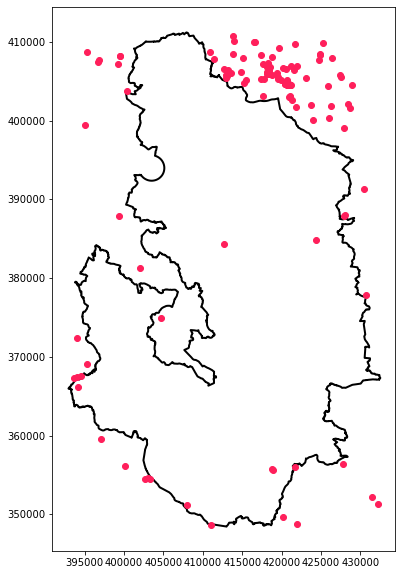

In [61]:
# add the boundary
pdnp = gpd.read_file('C:/Users/alexad/Documents/ArcGIS/Projects/Wind-Turbine/PDNP.shp')
# plot the layers
base = pdnp.plot(color='#ffffff', edgecolor='k', linewidth=2, figsize=(10, 10))
data_turbine.plot(ax=base, color='#ff1f5b')
# Turn plot axis on
ax.axis('on')
plt.show()

Lets clip the data to the PDNP boundary and export for request:

In [62]:
pdnp_turbines = gpd.clip(data_turbine, pdnp)

__main__:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: EPSG:27700



Lets export these points to a .shp file:

In [68]:
pdnp_turbines.to_file("pdnp_turbine.shp")

In [69]:
pdnp_turbines.head(n=10)

,geometry,OBJECTID,TOID,FeatureCode,Version,VersionDate,Theme,ThemeCount,AccuracyOfPosition,ChangeDate,ReasonForChange,ChangeHistoryCount,DescriptiveGroup,DescriptiveGroupCount,DescriptiveTerm,DescriptiveTermCount,HeightAboveDatum,AccuracyOfHeightAboveDatum,HeightAboveGroundLevel,AccuracyOfHeightAboveGroundLvl,Make,PhysicalLevel,PhysicalPresence,style_code
12874,POINT (394146.706 366244.053),1900300,osgb5000005199663565,10186,2,2/12/2018,Structures,1,2.5m,2/9/2018,Reclassified,2,Structure,1,Wind Turbine,1.0,NaN,null,None,null,Manmade,50,null,16
31930,POINT (407956.396 351229.801),1942433,osgb5000005168180017,10186,2,2/14/2018,Structures,1,2.5m,2/13/2018,Reclassified,2,Structure,1,Wind Turbine,1.0,NaN,null,None,null,Manmade,50,null,16
36924,POINT (412665.870 384366.938),1954461,osgb5000005241673547,10186,1,1/24/2019,Structures,1,2.5m,1/23/2019,New,1,Structure,1,Wind Turbine,1.0,NaN,null,None,null,Manmade,50,null,16
40203,POINT (418808.616 355771.831),1962265,osgb5000005168473181,10186,2,2/14/2018,Structures,1,2.5m,2/13/2018,Reclassified,2,Structure,1,Wind Turbine,1.0,NaN,null,None,null,Manmade,50,null,16
40371,POINT (418839.969 355688.222),1962433,osgb5000005168473183,10186,2,2/14/2018,Structures,1,2.5m,2/13/2018,Reclassified,2,Structure,1,Wind Turbine,1.0,NaN,null,None,null,Manmade,50,null,16
47422,POINT (424310.162 384904.248),1975020,osgb5000005143044078,10186,2,2/14/2018,Structures,1,8.0m,2/13/2018,Reclassified,2,Structure,1,Wind Turbine,1.0,NaN,null,None,null,Manmade,50,null,16
